<a href="https://colab.research.google.com/github/LongLongoooo/AIO_233/blob/AIO_Module_4/M02W04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Advertising data
!gdown 147FUijJc2yuu5S5CEDOx46vElUDGhAhE

# Bitcoin data|
!gdown 1J-5CIhfaQpSY_HuICuQJa6OvHzTQXj4Q

Downloading...
From: https://drive.google.com/uc?id=147FUijJc2yuu5S5CEDOx46vElUDGhAhE
To: /content/advertising.csv
100% 4.06k/4.06k [00:00<00:00, 12.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1J-5CIhfaQpSY_HuICuQJa6OvHzTQXj4Q
To: /content/BTC-Daily.csv
100% 257k/257k [00:00<00:00, 7.69MB/s]


# ***Linear Regression by Vectorization***

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
# dataset
data = np.genfromtxt("/content/advertising.csv", delimiter=",", skip_header=1)
N = data.shape[0]
X = data[:, :3]
y = data[:, 3:]
# Nomalize input data by using mean normalization
def mean_normalization(X):
  N = len(X)
  maxi = np.max(X)
  mini = np.min(X)
  avg = np.mean(X)
  X = (X-avg) / (maxi-mini)
  X_b = np.c_[np.ones((N, 1)), X]
  return X_b, maxi, mini, avg

**Stochastic Gradient descent**

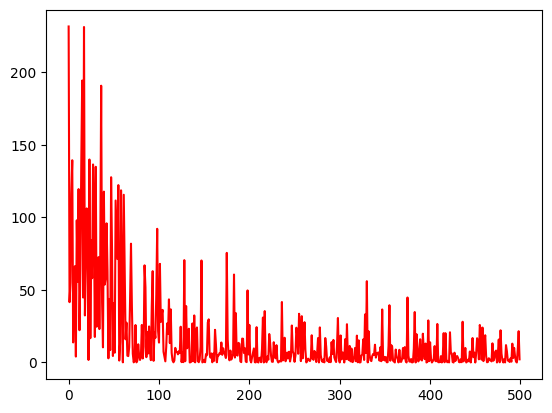

6754.643359356192


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.00001):
    N = X_b.shape[0]  # Number of samples
    # thetas = np.random.randn(1, X_b.shape[1])  # Initialize thetas with correct shape (1, 4)
    thetas = np. asarray ([[1.16270837] , [ -0.81960489] , [1.39501033] ,[0.29763545]])
    thetas_path = [thetas]  # To store each update of thetas
    losses = []

    for epoch in range(n_epochs):
        for i in range(N):
            # Randomly pick a sample (you can replace this with random_index if needed)
            # random_index = np.random.randint(N)  # Get random index in range [0, N-1]
            random_index = i
            xi = X_b[random_index:random_index + 1]  # Get a single sample (1, 4)
            yi = y[random_index:random_index + 1]    # Get the corresponding label

            # Compute prediction
            y_hat = xi.dot(thetas)

            # Compute loss
            loss = (y_hat-yi)*(y_hat-yi)/2

            # Compute gradient
            k = y_hat - yi
            dl_dthetas = xi.T.dot(k)

            # Update thetas
            thetas = thetas - learning_rate * dl_dthetas

            thetas_path.append(thetas)  # Store the updated thetas
            losses.append(loss[0][0])
    return thetas_path, losses

X_b, maxi, mini, avg = mean_normalization(X)
sgd_theta,losses = stochastic_gradient_descent (X_b , y, n_epochs =50 ,learning_rate =0.01 )
x_axis = list (range (500))
plt.plot ( x_axis , losses [:500] , color ="r")
plt.show ()
sgd_theta , losses = stochastic_gradient_descent (X_b , y, n_epochs =1, learning_rate=0.01 )
print(np.sum( losses ))

**Mini batch gradient descent**

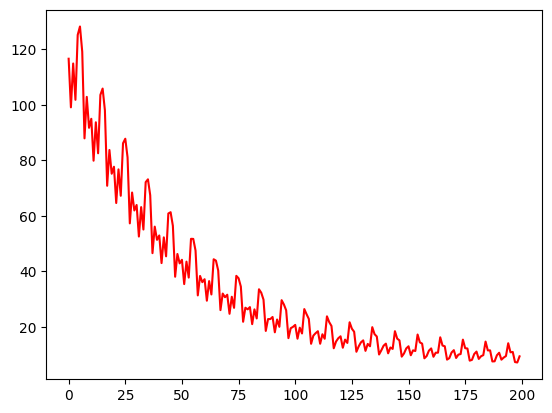

8865.65


In [4]:
# Main Mini-Batch Gradient Descent
def mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01):
    # Initialize thetas (fixed for assignment)
    # thetas = np. random . randn (4, 1)
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])
    thetas_path = [thetas]
    losses = []
    N = X_b.shape[0]  # Total number of samples
    for epoch in range(n_epochs):
        # Shuffle the data indices (uncomment for real application)
        # shuffled_indices = np.random.permutation(N)
        shuffled_indices = np.asarray([21, 144, 17, 107, 37, 115, 167, 31, 3, 132, 179, 155, 36, 191, 182, 170, 27, 35,
                                       162, 25, 28, 73, 172, 152, 102, 16, 185, 11, 1, 34, 177, 29, 96, 22, 76, 196, 6,
                                       128, 114, 117, 111, 43, 57, 126, 165, 78, 151, 104, 110, 53, 181, 113, 173, 75,
                                       23, 161, 85, 94, 18, 148, 190, 169, 149, 79, 138, 20, 108, 137, 93, 192, 198, 153,
                                       4, 45, 164, 26, 8, 131, 77, 80, 130, 127, 125, 61, 10, 175, 143, 87, 33, 50, 54,
                                       97, 9, 84, 188, 139, 195, 72, 64, 194, 44, 109, 112, 60, 86, 90, 140, 171, 59,
                                       199, 105, 41, 147, 92, 52, 124, 71, 197, 163, 98, 189, 103, 51, 39, 180, 74, 145,
                                       118, 38, 47, 174, 100, 184, 183, 160, 69, 91, 82, 42, 89, 81, 186, 136, 63, 157,
                                       46, 67, 129, 120, 116, 32, 19, 187, 70, 141, 146, 15, 58, 119, 12, 95, 0, 40, 83,
                                       24, 168, 150, 178, 49, 159, 7, 193, 48, 30, 14, 121, 5, 142, 65, 176, 101, 55,
                                       133, 13, 106, 66, 99, 68, 135, 158, 88, 62, 166, 156, 2, 134, 56, 123, 122, 154])

        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, N, minibatch_size):
            xi = X_b_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]

            # Compute output (predicted values)
            y_hat = np.dot(xi, thetas)

            # Compute loss for the mini-batch
            # loss =  float(1/batch * np.dot((y_hat - yi).T, (y_hat - yi)))
            loss = np.mean((y_hat - yi)**2)/2
            losses.append(loss)

            # Compute gradient of the loss with respect to thetas Xt_k
            error = (y_hat - yi)
            dl_dthetas = np.dot(xi.T, error) / minibatch_size

            # Update thetas
            thetas = thetas - learning_rate * dl_dthetas
            thetas_path.append(thetas)

    return thetas_path, losses

mbgd_thetas , losses = mini_batch_gradient_descent (X_b , y, n_epochs =50 , minibatch_size = 20, learning_rate =0.01)
x_axis = list ( range (200) )
plt . plot ( x_axis , losses [:200] , color ="r")
plt . show ()

print ( round ( sum( losses ) ,2))



**Batch gradient descent**

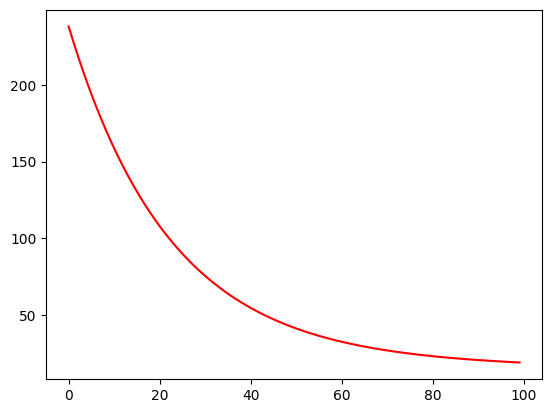

6716.46


In [6]:
def batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01):
    losses = []

    # thetas = np. random . randn (4, 1)
    thetas = np. asarray ([[1.16270837] , [ -0.81960489] , [1.39501033] ,[0.29763545]])
    thetas_path =[thetas]
    N = X_b.shape[0]
    for _ in range(100):
      # Compute predict
      y_hat = X_b.dot(thetas)

      # Compute Loss
      loss = np.mean((y_hat - y)**2)
      losses.append(loss)

      # Compute gradient
      k = (y_hat - y)
      gradient = 2*np.dot(X_b.T, k)/N

      # Update thets
      thetas = thetas - learning_rate*gradient
      thetas_path.append(thetas)
    return thetas_path, losses

thetas_path, losses = batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01)
x_axis = list(range(100))

plt.plot(x_axis, losses[:100], color="r")
plt.show()
print ( round ( sum( losses ) ,2))

# ***Bitcoin Forecasting***

**Read dataset**

In [7]:
import pandas as pd

df = pd.read_csv("/content/BTC-Daily.csv")

df = df.drop_duplicates()


**Analysing data**

Date Range: 2014-11-28 to 2022-03-01


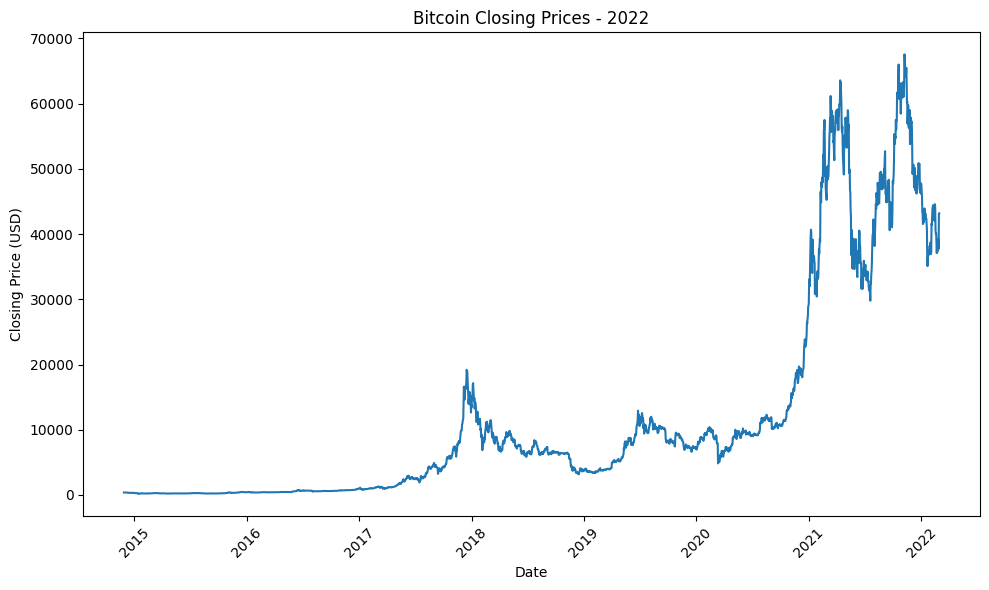

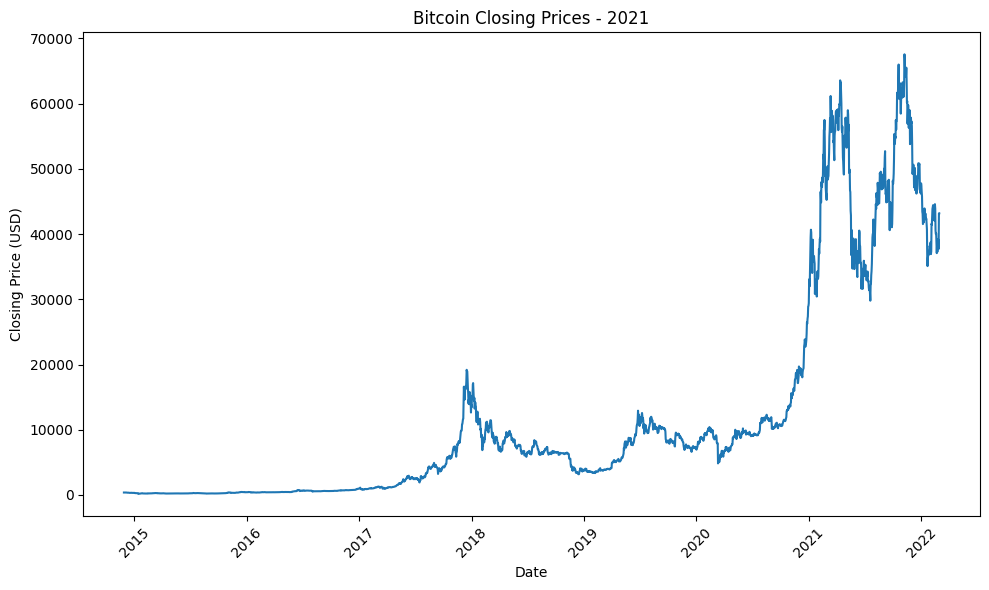

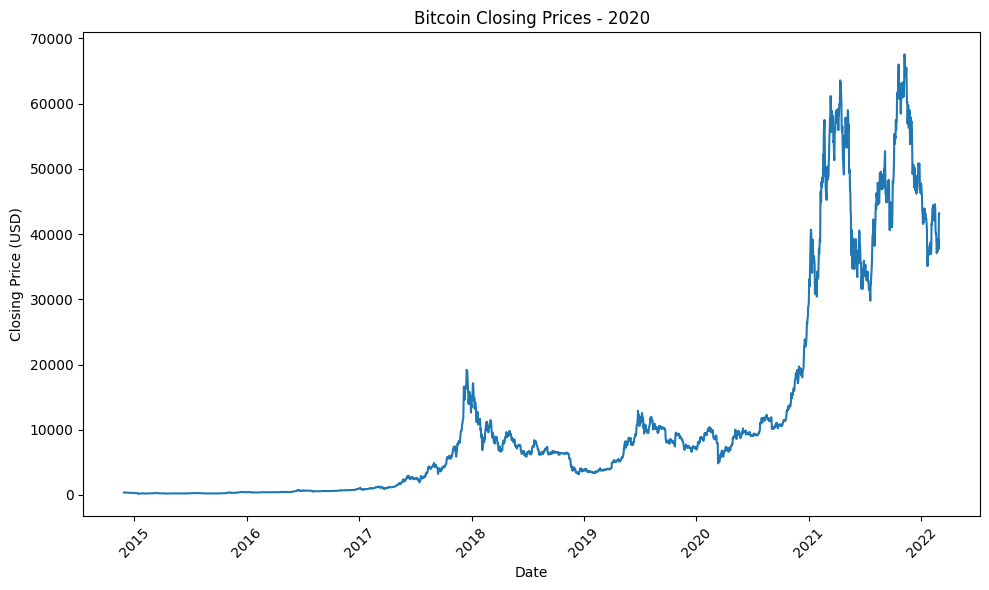

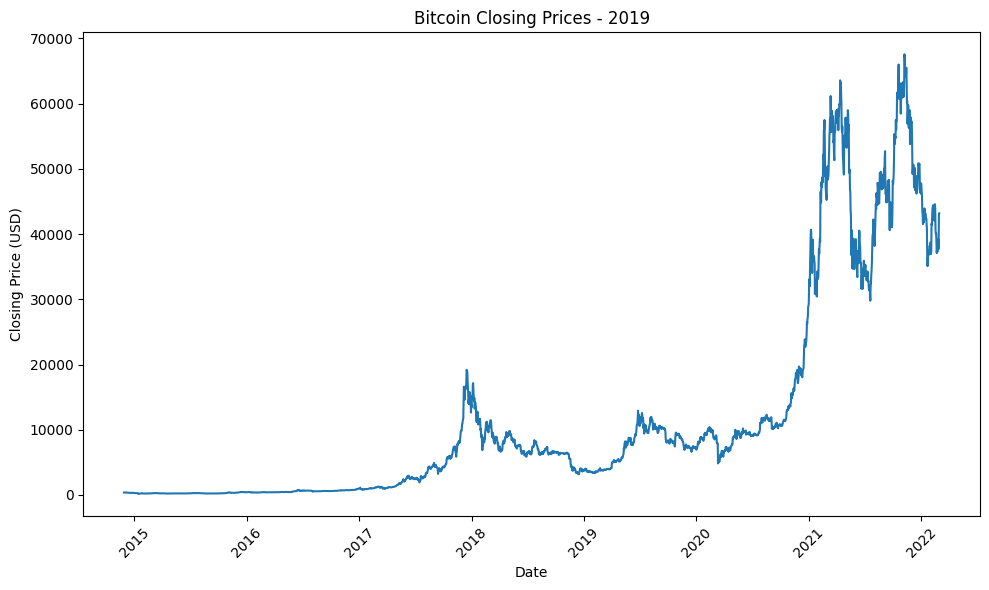

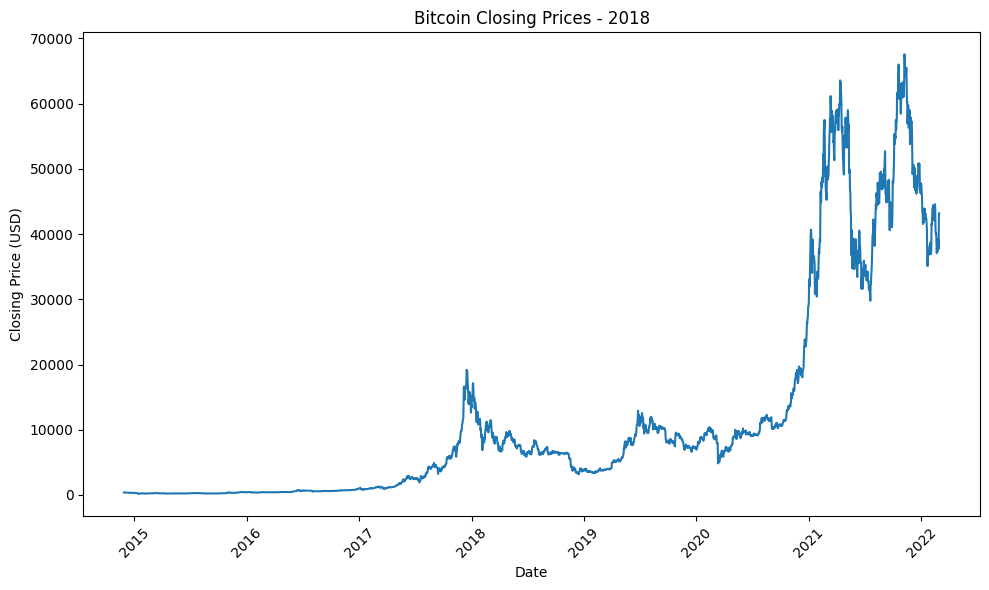

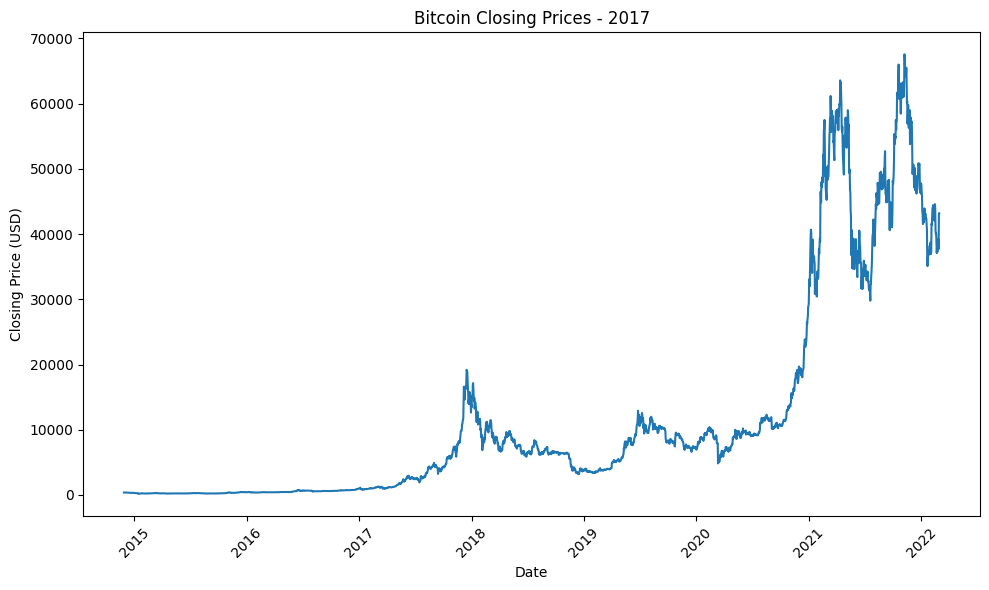

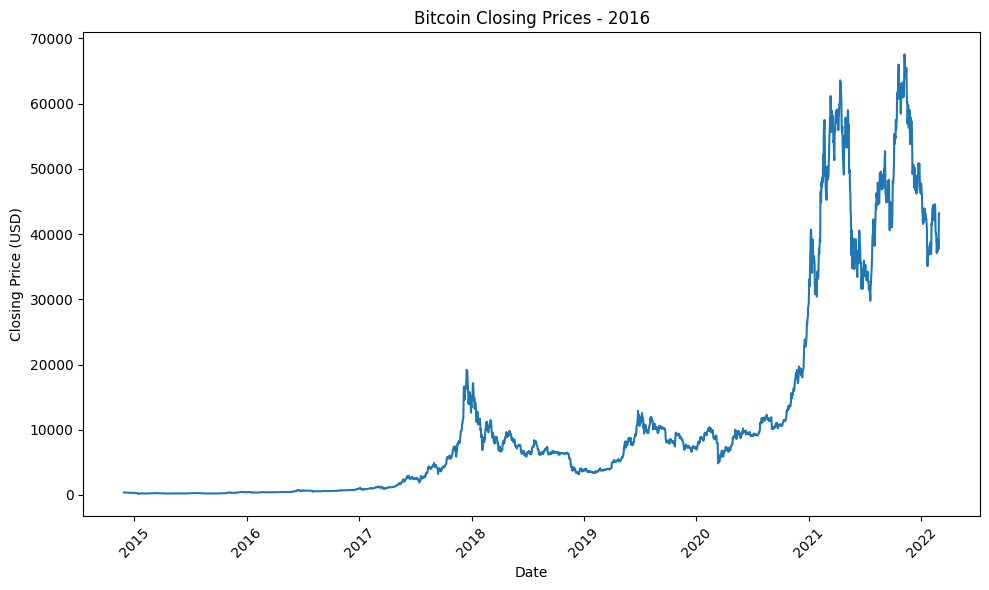

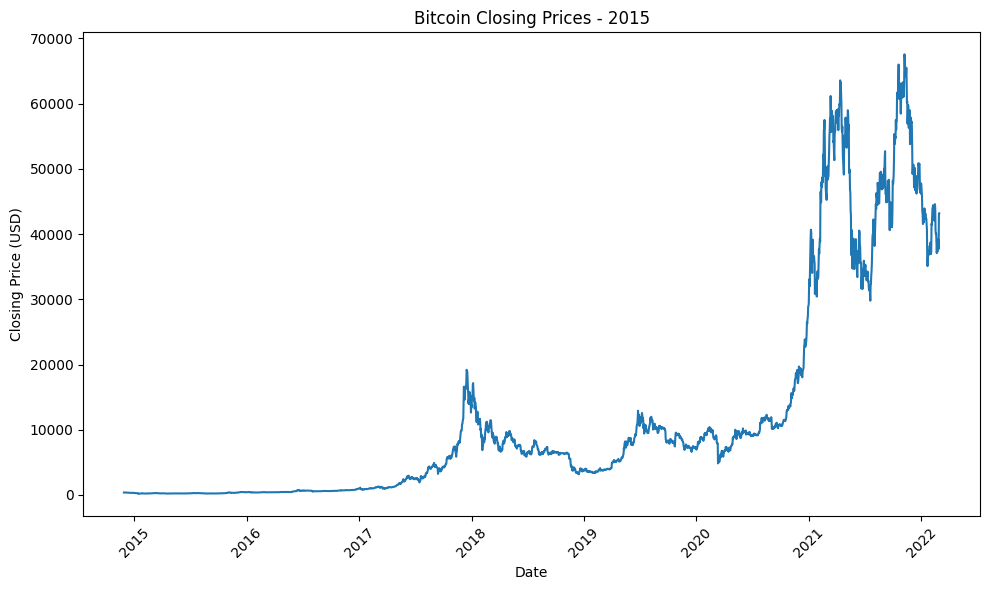

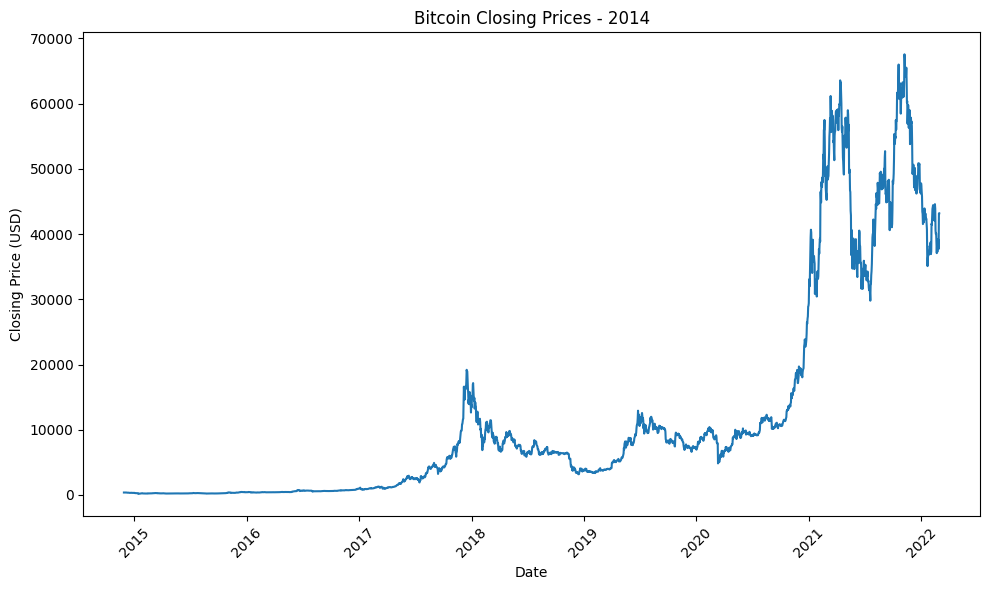

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Generate date range string
date_range = str(df['date'].dt.date.min()) + ' to ' + str(df['date'].dt.date.max())
print("Date Range:", date_range)

# Extract 'year', 'month', 'day' from 'date' for merging
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Create year-month-day combination for the full range of dates in the dataset
year_month_day = df[['year', 'month', 'day']].drop_duplicates()

# List of unique years in the data
unique_years = df['year'].unique()

# Loop through each year to plot Bitcoin prices
for year in unique_years:
    # Merge data on 'year', 'month', and 'day' to ensure dates are aligned
    merged_data = pd.merge(year_month_day, df, on=['year', 'month', 'day'], how='left')

    # Plot data for each year
    plt.figure(figsize=(10, 6))
    plt.plot(merged_data['date'], merged_data['close'], label=f"Year {year}")

    # Add titles and labels
    plt.title(f'Bitcoin Closing Prices - {year}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()


In [11]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.6 MB/s eta 0:00:00


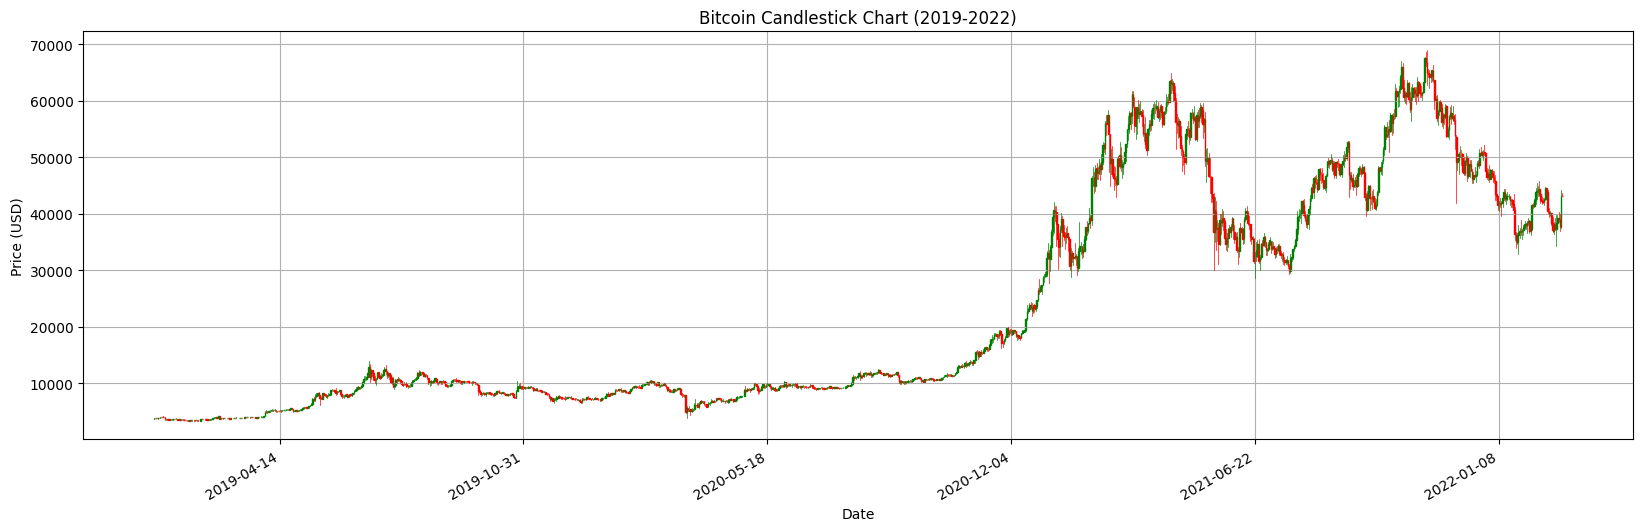

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
import datetime
import pandas as pd

# Filter data for 2019-2022
df_filtered = df[(df["date"] >= '2019-01-01') & (df["date"] <= '2022-12-31')].copy()

# Convert 'date' to matplotlib format
df_filtered['date'] = df_filtered['date'].map(mdates.date2num)

# Create the candlestick chart
fig, ax = plt.subplots(figsize=(20, 6))

candlestick_ohlc(ax, df_filtered[['date', 'open', 'high', 'low', 'close']].values,
                 width=0.6, colorup='g', colordown='r')

# Set the x-axis date format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

# Add titles and labels
plt.title('Bitcoin Candlestick Chart (2019-2022)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)

# Save the plot as a PDF
plt.savefig('bitcoin_candlestick_2019_2022.pdf')

# Show the plot
plt.show()


**Linear Regression model**

**Normalize train and test sets**

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
scalar = StandardScaler()
#Converting Date to numerical form

df['date_str'] = df['date'].dt.strftime('%Y%m%d%H%M%S')

# Convert the string date to a numerical value
df['NumericalDate'] = pd.to_numeric(df['date_str'])

# Drop the intermediate 'date_str' column if not needed
df.drop(columns=['date_str'], inplace=True)

df["Standardized_Close_Prices"] = scalar.fit_transform(df["close"].values.reshape(-1,1))
df["Standardized_Open_Prices"] = scalar.fit_transform(df["open"].values.reshape(-1,1))
df["Standardized_High_Prices"] = scalar.fit_transform(df["high"].values.reshape(-1,1))
df["Standardized_Low_Prices"] = scalar.fit_transform(df["low"].values.reshape(-1,1))


X = df[["Standardized_Open_Prices", "Standardized_High_Prices", "Standardized_Low_Prices"]]
y = df["Standardized_Close_Prices"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42, shuffle=True)
# lr = LinearRegression()
# lr.fit(X_train, y_train)

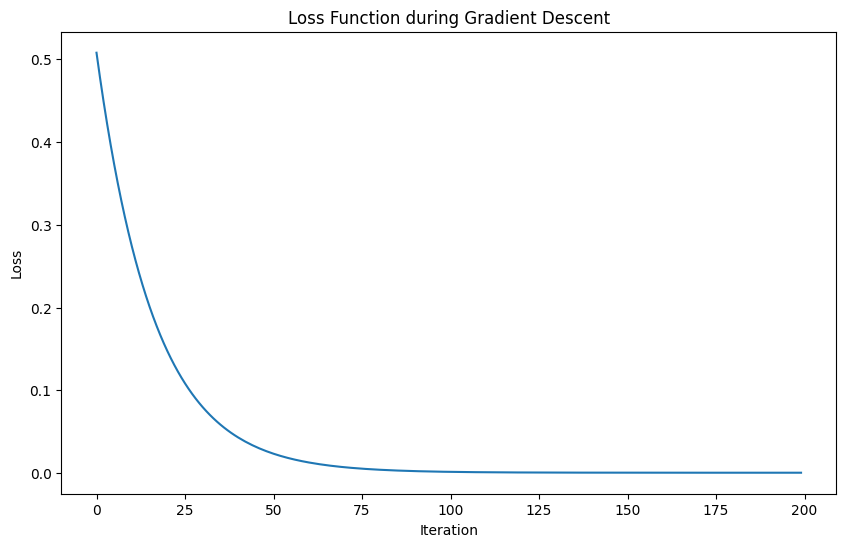

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Function to predict y values
def predict(X, w, b):
    return X.dot(w) + b

# Function to compute gradients and cost
def gradient(y_hat, y, X):
    loss = y_hat - y
    dw = X.T.dot(loss) / len(y)
    db = np.sum(loss) / len(y)
    cost = np.sum(loss**2) / (2 * len(y))
    return (dw, db, cost)

# Function to update weights and bias
def update_weight(w, b, lr, dw, db):
    w_new = w - lr * dw
    b_new = b - lr * db
    return (w_new, b_new)

# Linear regression with gradient descent (vectorized)
def linear_regression_vectorized(X, y, learning_rate=0.01, num_iterations=200):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)  # Initialize weights as zeros
    b = 0  # Initialize bias as zero
    losses = []

    for _ in range(num_iterations):
        # Predict
        y_hat = predict(X, w, b)

        # Calculate gradient and cost
        dw, db, cost = gradient(y_hat, y, X)

        # Update weights and bias
        w, b = update_weight(w, b, learning_rate, dw, db)

        # Store cost (loss)
        losses.append(cost)

    return w, b, losses

# Assuming X_train and y_train are defined earlier

# Train the model
w, b, losses = linear_regression_vectorized(X=X_train, y=y_train, learning_rate=0.01, num_iterations=200)

# Plot the loss function
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Function during Gradient Descent')
plt.show()


In [77]:
from sklearn . metrics import r2_score

# Make predictions on the test set
y_pred = predict ( X_test , w, b)

# Calculate RMSE
rmse = np. sqrt (np. mean (( y_pred - y_test ) ** 2))

# Calculate MAE
mae = np. mean (np.abs ( y_pred - y_test ))
# Calculate MAPE
mape = np. mean (np. abs (( y_test - y_pred ) / y_test )) * 100

# Calculate R- squared on training data
y_train_pred = predict ( X_train , w, b)
train_accuracy = r2_score ( y_train , y_train_pred )

# Calculate R- squared on testing data
test_accuracy = r2_score (y_test , y_pred )

print (" Root Mean Square Error ( RMSE ):", round (rmse , 4))
print (" Mean Absolute Error ( MAE):", round (mae , 4))
print (" Training Accuracy (R- squared ):", round ( train_accuracy , 4))
print (" Testing Accuracy (R- squared ):", round ( test_accuracy , 4))

 Root Mean Square Error ( RMSE ): 0.0293
 Mean Absolute Error ( MAE): 0.0138
 Training Accuracy (R- squared ): 0.9989
 Testing Accuracy (R- squared ): 0.9991


<ipython-input-80-75bae4b932f5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019_Q1['predicted_close'] = df_2019_Q1['close'].shift(1)


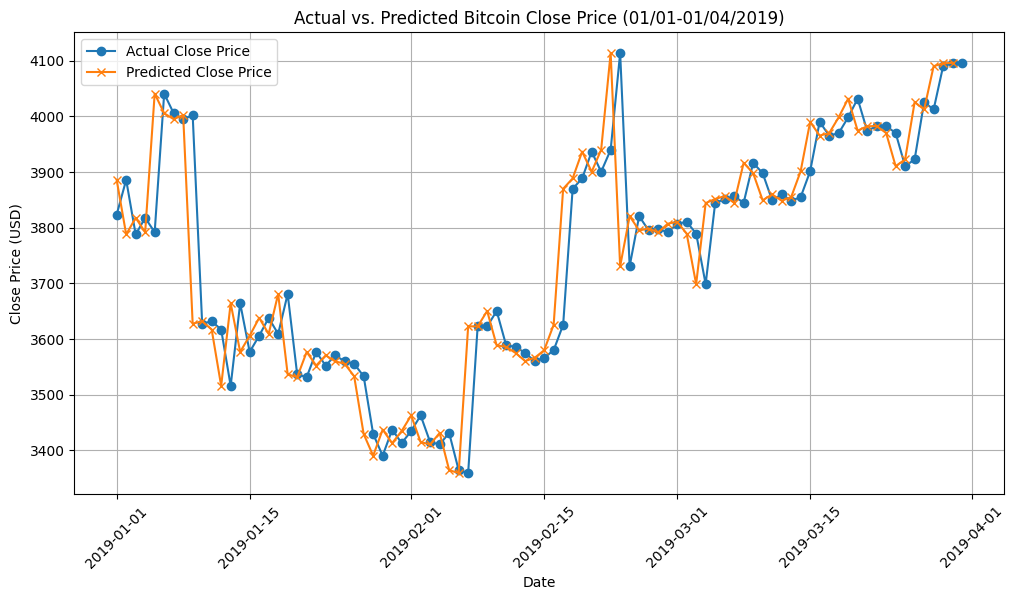

In [80]:
# Filter data for 2019-01-01 to 2019-03-31
df_2019_Q1 = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2019-03-31')]

# Assuming you have a way to predict the close prices for 2019-01-01 to 2019-03-31 (replace with your prediction method)
# For this example, I'll just use the previous day's close price as a simple prediction.
df_2019_Q1['predicted_close'] = df_2019_Q1['close'].shift(1)

# Create a plot
plt.figure(figsize=(12, 6))
plt.plot(df_2019_Q1['date'], df_2019_Q1['close'], label='Actual Close Price', marker='o')
plt.plot(df_2019_Q1['date'], df_2019_Q1['predicted_close'], label='Predicted Close Price', marker='x')
plt.title('Actual vs. Predicted Bitcoin Close Price (01/01-01/04/2019)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
